# Objective 
1. Test MTCNN (face detection) performance 
2. Document the performance metric(s)

# Approach
1. Manual labelling for true actual case. face(s) detected is encoded by 0, non ktp encoded by 1
2. Mix with non-face images for false case
3. feed into MTCNN
4. Document any related metrics

# Dependencies

In [1]:
import os
import glob
import re
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mtcnn.mtcnn import MTCNN
import io
from PIL import Image, ImageOps

# Preparing Data

In [2]:
# dataset path
# ktp images
ktp_data = glob.glob('./dataset-ktp/ID Card/train data/*')

# non face images
temp1_data = glob.glob('./dataset-bag/Keepall 55/*')
temp2_data = glob.glob('./dataset-bag/Speedy 30/*')
temp1_data.extend(temp2_data)
bag_data = temp1_data

Total ktp data and total non-ktp data

In [3]:
print(f'ktp data: {len(ktp_data)} \
        non-ktp data: {len(bag_data)}')

ktp data: 397         non-ktp data: 325


KTP photo and non-ktp photo example

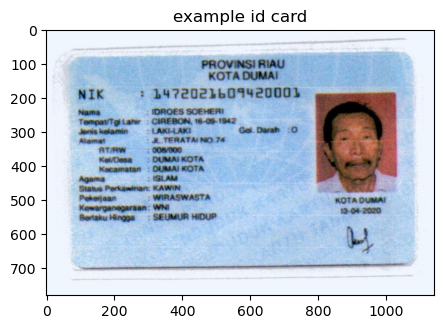

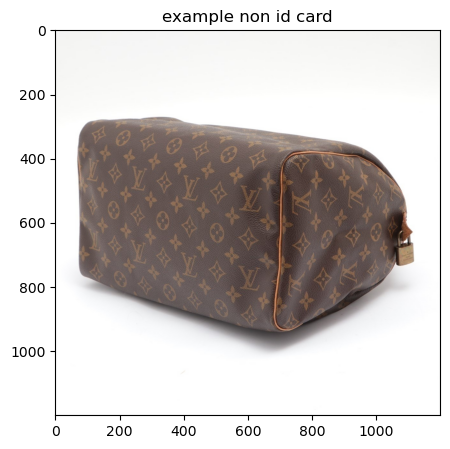

In [10]:
# open example ktp data 
with open(ktp_data[0], mode='rb') as file:
    file_bytes = file.read()
img_pil = Image.open(io.BytesIO(file_bytes))
img_pil = ImageOps.exif_transpose(img_pil)
ex_ktp = np.array(img_pil)

# open example non-ktp data 
with open(bag_data[200], mode='rb') as file:
    file_bytes = file.read()
img_pil = Image.open(io.BytesIO(file_bytes))
img_pil = ImageOps.exif_transpose(img_pil)
ex_non_ktp = np.array(img_pil)


# plotting
plt.figure(figsize=(5, 5))
plt.imshow(ex_ktp)
plt.title("example id card")
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(ex_non_ktp)
plt.title("example non id card")
plt.show()

# Function helper

In [5]:
# resize 
def resize(arr):
    h, w, c = arr.shape
    width = 1280
    height = int(h * (1280/w))
    
    img_arr = cv2.resize(arr, (width, height), interpolation=cv2.INTER_LINEAR)
    return img_arr

def open_img(path):
    with open(path, mode='rb') as file:
        file_bytes = file.read()
        img_pil = Image.open(io.BytesIO(file_bytes))
        img_pil = ImageOps.exif_transpose(img_pil)
        img_numpy = np.array(img_pil)
    
    return img_numpy

# Labelling

face(s) detected is encoded by 0, non ktp encoded by 1

In [19]:
# labelling
dataset = list()
imgs_data = [ktp_data, bag_data]

for a, b in enumerate(imgs_data):
    for img in b:
        img = open_img(img)
        img = resize(img)
        if a == 0:
            dataset.append(np.array([img, 0], dtype=object))
        else:
            dataset.append(np.array([img, 1], dtype=object))
            
dataset = np.array(dataset, dtype=object)

In [28]:
# shuffle
np.random.shuffle(dataset)

In [29]:
dataset[:, 1]

array([1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,

# MTCNN

In [32]:
ds_test = np.copy(dataset)
y_pred = list()
detector = MTCNN()

for img in ds_test[:, 0]:
    
    # predict
    result = detector.detect_faces(img)
    if len(result) != 0:
        y_pred.append(0)
    else: 
        y_pred.append(1)

y_pred = np.array(y_pred, dtype=object)

In [33]:
y_pred

array([1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,

# Performance

In [46]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
# from sklearn.metrics import f1_score
import pandas as pd

cm = confusion_matrix(dataset[:, 1].tolist(), y_pred.tolist())
df = pd.DataFrame(data=cm, index=['Positive', 'Negative'], columns=['True', 'False'])
df

,True,False
Positive,359,38
Negative,20,305


In [45]:
accuracy_score(dataset[:, 1].tolist(), y_pred.tolist())

0.9196675900277008